<a href="https://colab.research.google.com/github/nina-mesyngier/ds200-projects/blob/main/DS200_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
path_data = '../../../assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Problem 1


We will study a population of bike rental times.


There are 354,152 rows, each corresponding to a bike rental. The columns are the date of the trip ID, the duration of the trip in seconds, the trip start date, the starting trip station, the starting terminal, the end date of the trip, the end date of the trip, the end terminal, the bike number, the subscriber type, and the zip code.

In [ ]:
bike_rentals = Table.read_table('https://raw.githubusercontent.com/data-8/textbook/refs/heads/main/assets/data/trip.csv')
bike_rentals

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [ ]:
bike_rentals.column('Duration').min()

60

In [ ]:
bike_rentals.column('Duration').max()

17270400

The minimum trip duration was 60 seconds and the longest trip duration was 17270400 seconds.

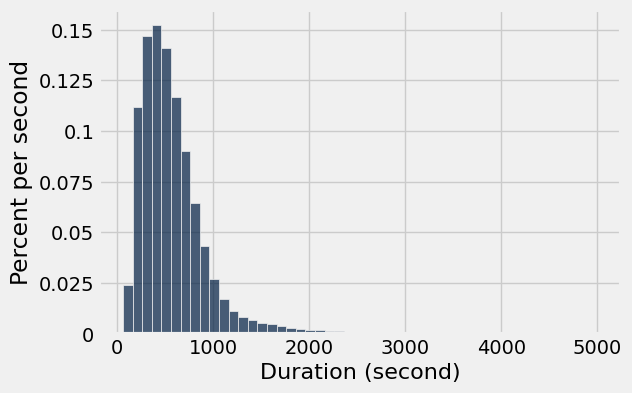

In [ ]:
duration_bins = np.append(np.arange(60, 4001, 100),5000)
bike_rentals.hist('Duration', bins = duration_bins, unit = 'second')


In [ ]:
included_values = bike_rentals.where('Duration',are.below(5000))
fraction_excluded = 1 - bike_rentals.where('Duration', are.above(200)).num_rows/bike_rentals.num_rows
fraction_excluded

0.05568795319523823

For the purposes of this section, it is enough to zoom in on the bulk of the data and ignore the 5.57% of flights that had durations of more than 500 seconds. This restriction is just for visual convenience; the table still retains all the data.

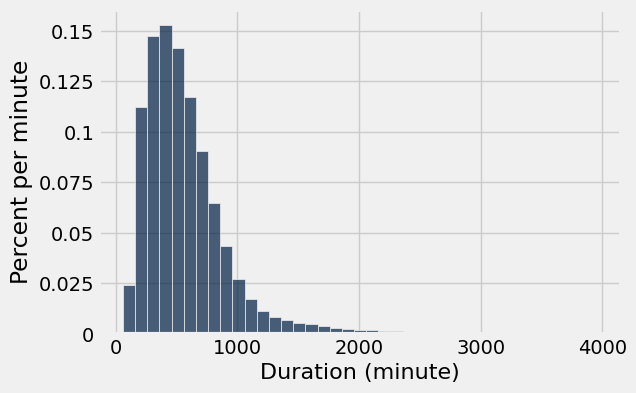

In [ ]:
duration_bins = np.arange(60, 4001, 100)
bike_rentals.hist('Duration', bins = duration_bins, unit = 'minute')

The height of the [60, 160) bar is just under 2.5% per minute, which means that just under 25% of the bike rentals had durations between 60 and 160 seconds. That is confirmed by counting rows:

In [ ]:
bike_rentals.where('Duration', are.between(60, 160)).num_rows/bike_rentals.num_rows

0.023354378910750186

Next, we are going to find the mean and median of the entire data set to get a better idea of the overall distribution of the data.

In [ ]:
np.median(bike_rentals.column('Duration'))


511.0

In [ ]:
np.mean(bike_rentals.column('Duration'))

1046.0326611172604

Due to the fact that the distribution has outliers that are larger than most of the data, the mean, 1046.03, is significantly larger than the median, 511.0.

# Simulating and Visualizing with Sample Medians

We first need to store a single sample mean.

In [ ]:
def random_sample_median():
    return np.median(bike_rentals.sample(100).column('Duration'))

Next, we must decide how many sample medians we want to generate. For this lab we are doing 5,000

In [ ]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

Next, we are going to make a histogram to display the sample medians

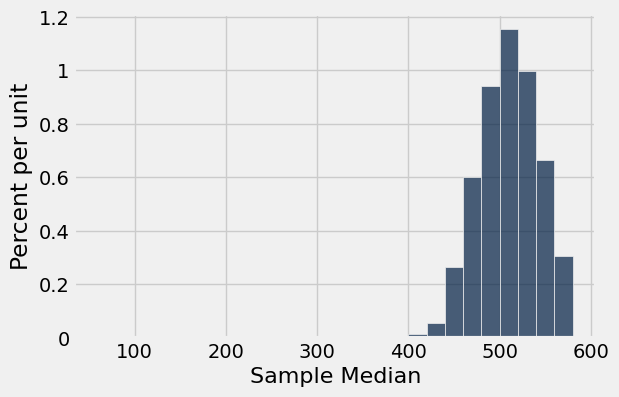

In [ ]:
simulated_medians = Table().with_column('Sample Median', medians)

simulated_medians.hist(bins=np.arange(60, 600, 20))

Now we are going to repeat out simulation and visualization using a larger sample size, 400.

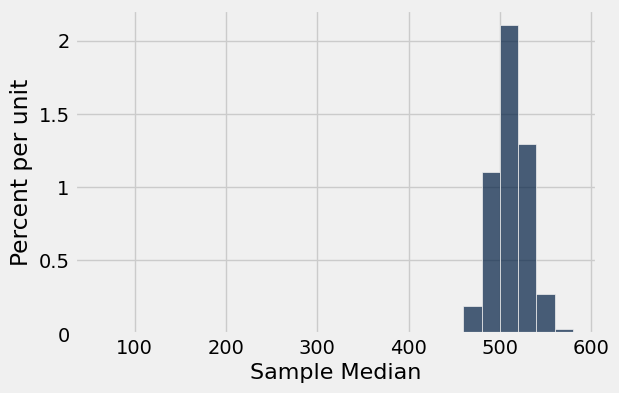

In [ ]:
# Find median of single random sample
def random_sample_median():
    return np.median(bike_rentals.sample(400).column('Duration'))

# Store medians of 5000 random samples
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

# Make table for histogram and display histogram
simulated_medians = Table().with_column('Sample Median', medians)

simulated_medians.hist(bins=np.arange(60, 600, 20))

Both histograms have a relatively normal distribution, mostly due to the number of samples taken. Also, both histograms are centered around 500. The obvious difference between the two histograms though is that the histogram which uses samples with a size of 100 is much more spread out than the one using samples with a size of 400. Furthermore, there is a significantly larger amount of data right around 500 for the histogram with sample sizes of 400, and we know that the median for the entire data set is 511, making the simulation of the second histogram quite accurate